'\nSo including the Gaussian destroys the oscillations. What about dissipation? Does adding a coupling \nterm fix this? So it gives me a Lorentzian?\n'

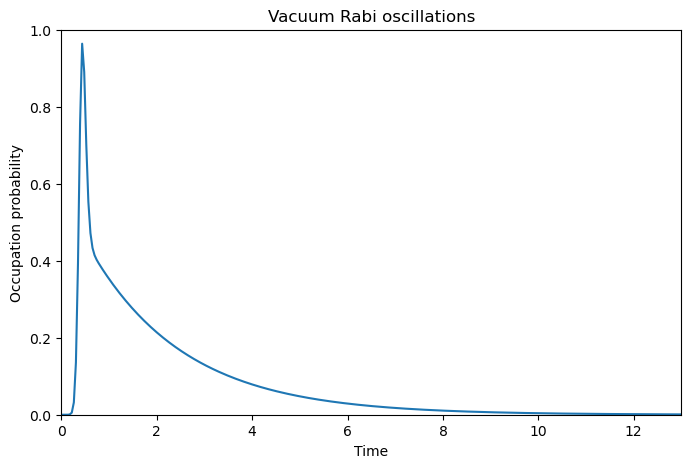

In [5]:
#So first I should call the libraries that I'm using numpy,qutip,scipy,and matplot
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *

'''
So the three-level system did not work, I have a couple of theories as to why it didn't work. First 
that there was the inclusion of a time dependent Hamiltonian. Second, after analysing the Rabi 
Oscillations simulation offered on qutip, our Hamiltonian does not have a coupling term. This seems 
more likely, but before I jump that ship. I wanna try just making a two-level system work. 

'''

'''
So in the previous one we defined a set of three level operators derived from the 3-level basis. Here
we only plan on fucking with the two, so that's what we're going to do. So using the same idea as 
given in (https://github.com/qutip/qutip-notebooks/blob/master/examples/rabi-oscillations.ipynb), I'm 
going to use sm and smdag
'''
#time parameters
tlist = np.linspace(0, 13, 300) #linspace(start,stop,num)
#Returns num evenly spaced samples, calculated over the interval [start, stop]
taulist = tlist #if we calculate g(2) we need a list time for the photon separations

#Gaussian wavepacket parameters - Including this now
tp = 0.1    # Gaussian pulse parameter - used the parameter given on the site 
Om = 19.40                   # driving strength - used parameter given on the site
t_offset = 0.405 #temporal offset for the first photon - used parameter given on the site
pulse_shape = Om/2 * np.exp(-(tlist - t_offset) ** 2 /
                                (2 * tp ** 2))

# initial state
psi0 = fock(2, 0)              # ground state

# operators
sm=destroy(2)
n = [sm.dag()*sm]           # number operator

# collapse operators describes dissipation
gamma = 0.5
c_ops = [np.sqrt(gamma) * sm]  # represents spontaneous emission

# Hamiltonian - The other major code change. 
H_I=[sm+sm.dag(),pulse_shape]

"'Now easy peasy, calculate the emission'"

output=mesolve(H_I, psi0, tlist,c_ops,n)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0])
ax.set_xlim(0, 13)
ax.set_ylim(0, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')

'''
So including the Gaussian destroys the oscillations. What about dissipation? Does adding a coupling 
term fix this? So it gives me a Lorentzian?
'''

In [ ]:
# Lowering to 0.1 gives me the least number of oscillations, so I'd say that this was my limit